In [ ]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten

### #Fetch Images count from Fodlers

In [ ]:
count = 0
dirs = os.listdir('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images')
for dir in dirs:
    files = list(os.listdir(os.path.join('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images', dir)))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Medical Leaf Folder has '+ str(count) + ' Images')

Amaranthus Viridis (Arive-Dantu) Folder has 122 Images
Artocarpus Heterophyllus (Jackfruit) Folder has 56 Images
Azadirachta Indica (Neem) Folder has 60 Images
Basella Alba (Basale) Folder has 103 Images
Brassica Juncea (Indian Mustard) Folder has 34 Images
Carissa Carandas (Karanda) Folder has 74 Images
Citrus Limon (Lemon) Folder has 57 Images
Ficus Auriculata (Roxburgh fig) Folder has 50 Images
Ficus Religiosa (Peepal Tree) Folder has 63 Images
Hibiscus Rosa-sinensis Folder has 43 Images
Jasminum (Jasmine) Folder has 71 Images
Mangifera Indica (Mango) Folder has 62 Images
Mentha (Mint) Folder has 97 Images
Moringa Oleifera (Drumstick) Folder has 77 Images
Muntingia Calabura (Jamaica Cherry-Gasagase) Folder has 56 Images
Murraya Koenigii (Curry) Folder has 60 Images
Nerium Oleander (Oleander) Folder has 62 Images
Nyctanthes Arbor-tristis (Parijata) Folder has 40 Images
Ocimum Tenuiflorum (Tulsi) Folder has 52 Images
Piper Betle (Betel) Folder has 48 Images
Plectranthus Amboinicus (Me

## #Load Images into Arrays as Dataset

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images/'
img_size = 180
batch = 32

In [ ]:

Plant_names = train_ds.class_names
Plant_names

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

In [ ]:
import matplotlib.pyplot as plt

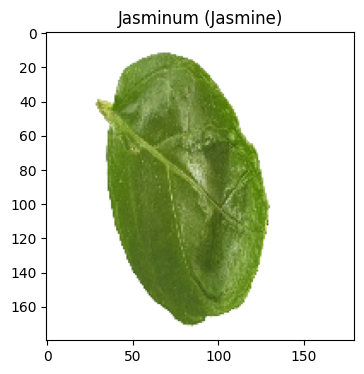

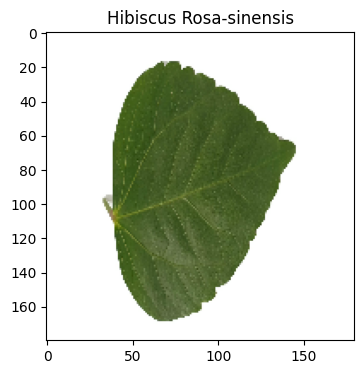

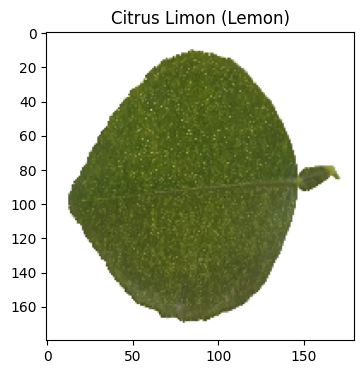

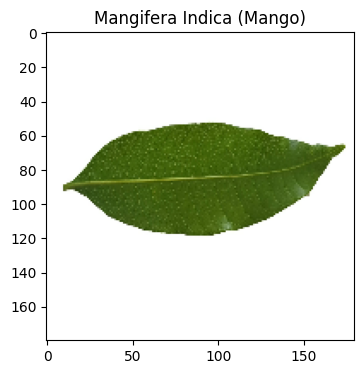

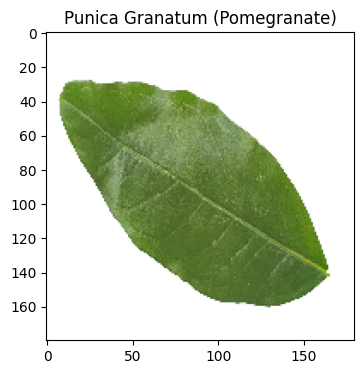

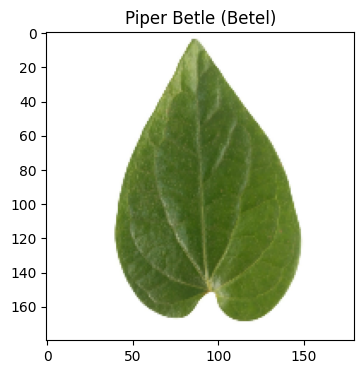

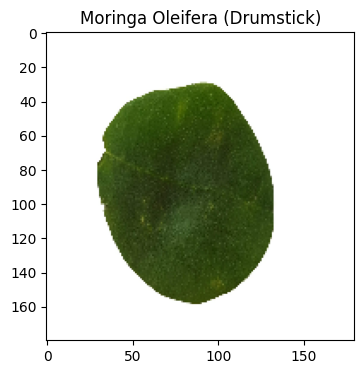

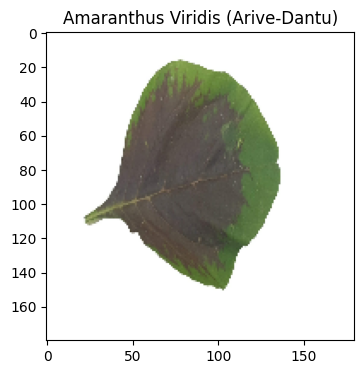

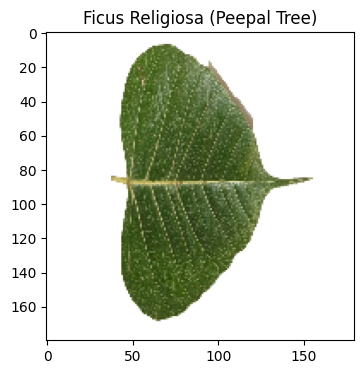

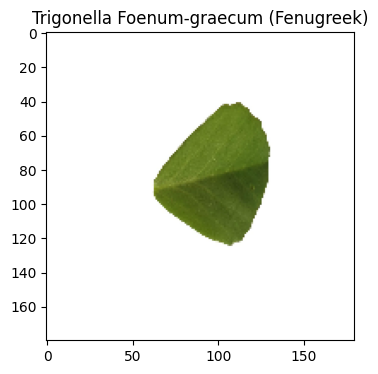

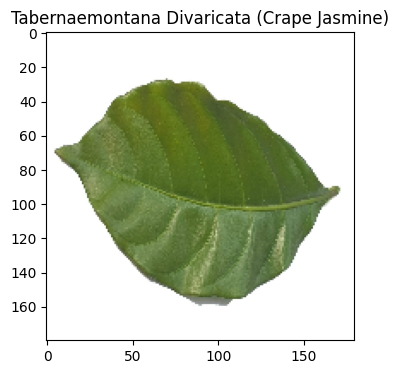

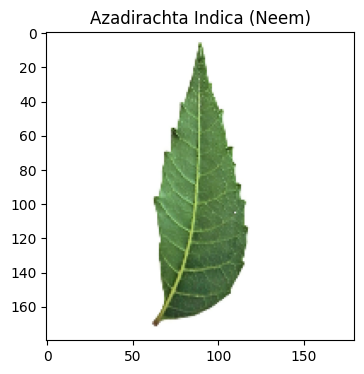

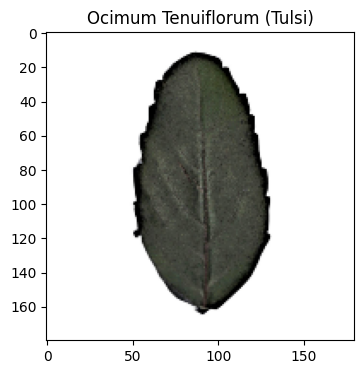

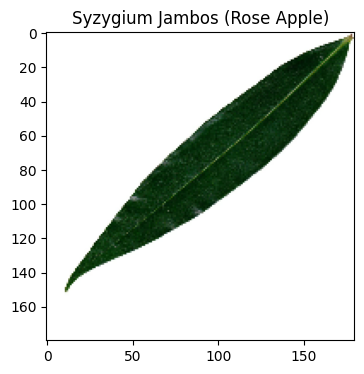

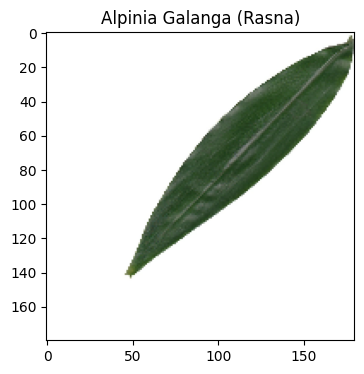

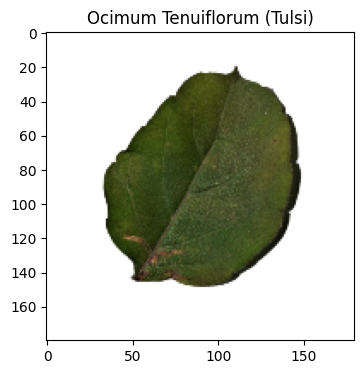

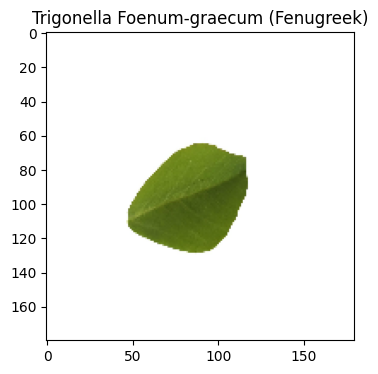

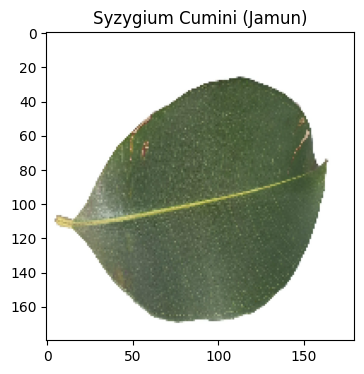

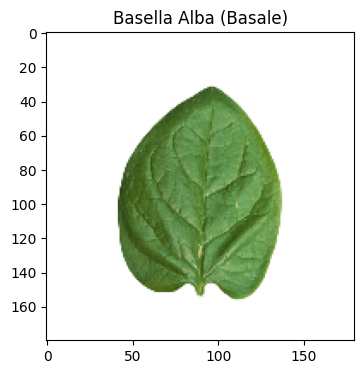

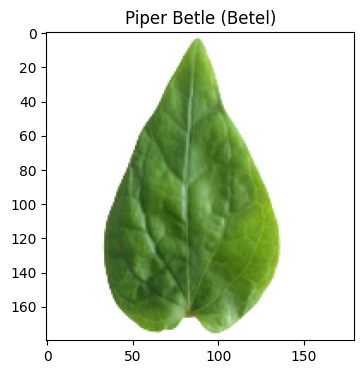

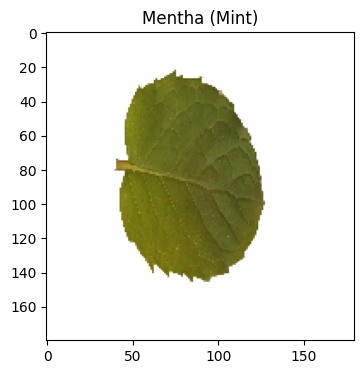

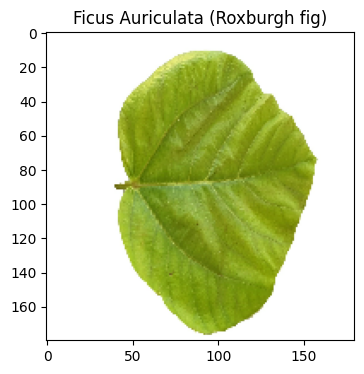

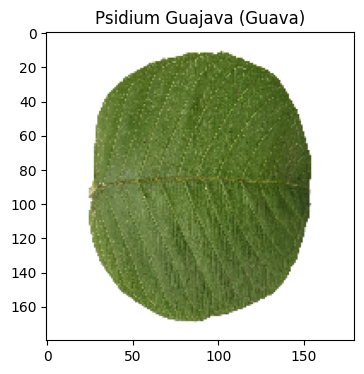

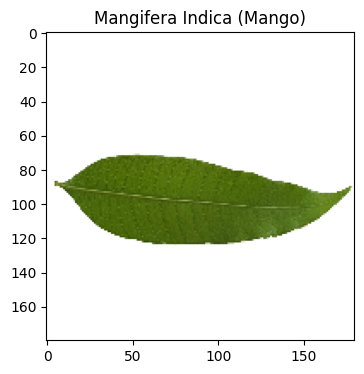

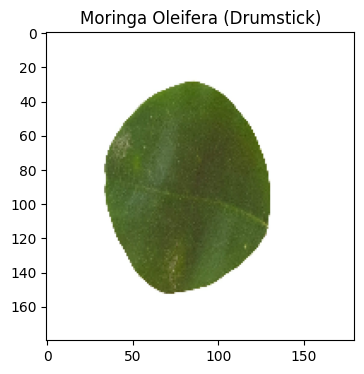

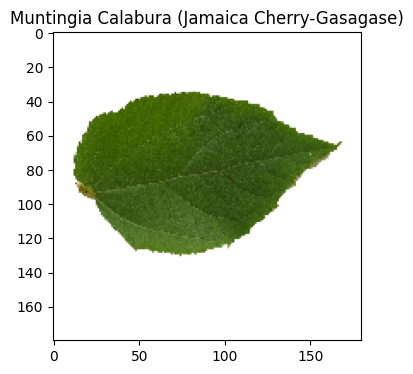

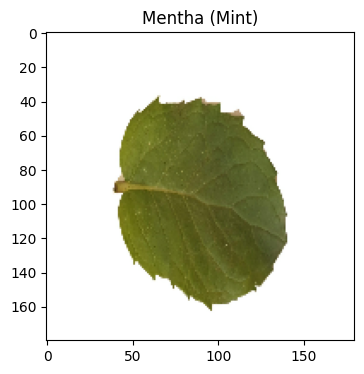

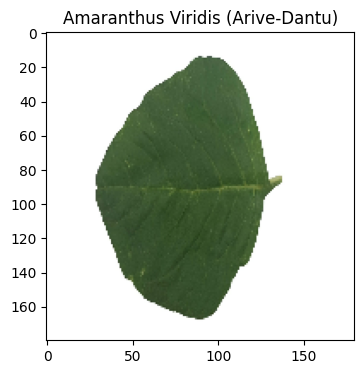

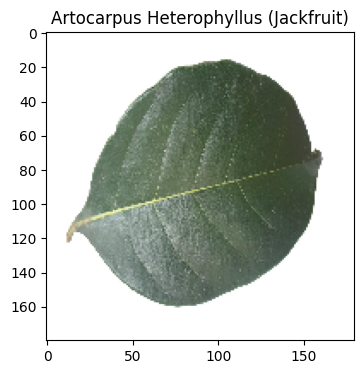

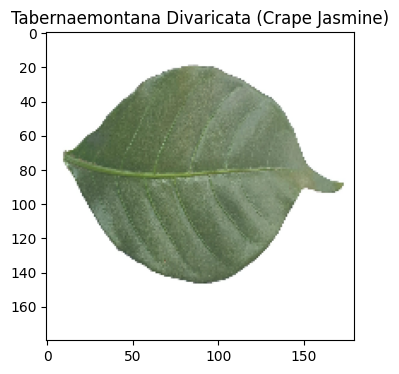

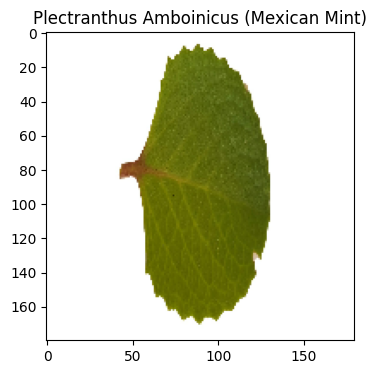

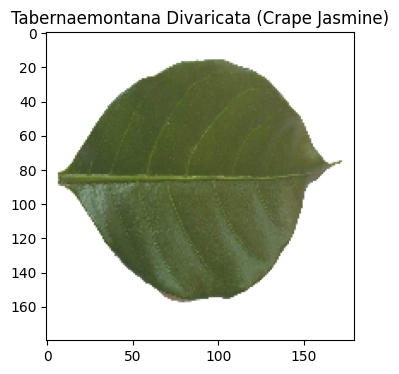

In [ ]:
# Display images of different leaves along with their labels separately
for images, labels in train_ds.take(1):  # Take a single batch of images and labels
    for i in range(len(images)):  # Loop through all images in the batch
        plt.figure(figsize=(4, 4))  # Create a separate figure for each image
        plt.imshow(images[i].numpy().astype('uint8'))  # Display the image
        plt.title(Plant_names[labels[i]])  # Set the title as the label name
        plt.axis('on')  # Remove axes for better visualization
        plt.show()  # Display the plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [ ]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

## #Data Augmentation

In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## #MOdel Creation

In [ ]:

# Build the model with 7 Conv2D layers and 30 output classes
model = Sequential([
    data_augmentation,  # Data augmentation layer for input images
    layers.Rescaling(1./255),  # Rescaling layer to normalize the pixel values to [0, 1]

    # First convolutional block
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Second convolutional block
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Third convolutional block
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),


    # Flatten layer to convert 4D output to 2D
    layers.Flatten(),




])

# Print the model summary to check the architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 2, 2, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        30,750 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,323,134 (24.12 MB)

 Trainable params: 6,323,134 (24.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_ds, epochs=25, validation_data=val_ds)

Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.0509 - loss: 3.3999 - val_accuracy: 0.0763 - val_loss: 3.3147
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1079 - loss: 3.1196 - val_accuracy: 0.0736 - val_loss: 3.2257
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.1518 - loss: 2.8064 - val_accuracy: 0.1771 - val_loss: 2.6795
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.1950 - loss: 2.5546 - val_accuracy: 0.3706 - val_loss: 2.2390
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.3464 - loss: 2.1152 - val_accuracy: 0.3951 - val_loss: 1.8021
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4427 - loss: 1.7725 - val_accuracy: 0.4768 - val_loss: 1.6507
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4698 - loss: 1.6794 - val_accuracy: 0.5014 - val_loss: 1.5658
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5210 - loss: 1.5135 - val_accuracy: 0.5668 - va

In [ ]:
def classify_images(image_dir):
  image_files = os.listdir('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images/Jasminum (Jasmine)')
  if not image_files:
        raise FileNotFoundError("No images found in the directory.")
  image_path = os.path.join(image_dir, image_files[0])  # Select the first image
  input_image = tf.keras.utils.load_img(image_dir, target_size=(180,180))
  input_image_array = tf.keras.utils.img_to_array(input_image)
  input_image_exp_dim = tf.expand_dims(input_image_array,0)

  predictions = model.predict(input_image_exp_dim)
  result = tf.nn.softmax(predictions[0])
  outcome = 'The Image belongs to ' + Plant_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
  return outcome

In [ ]:

from tensorflow.keras import backend as K

# Precision
def precision(y_true, y_pred):
    y_pred = tf.round(y_pred)  # Convert probabilities to binary outputs
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)  # True positives
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)  # False positives
    precision = tp / (tp + fp + K.epsilon())  # Avoid division by zero
    return K.mean(precision)  # Return mean precision across all classes

# Recall
def recall(y_true, y_pred):
    y_pred = tf.round(y_pred)  # Convert probabilities to binary outputs
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)  # True positives
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)  # False negatives
    recall = tp / (tp + fn + K.epsilon())  # Avoid division by zero
    return K.mean(recall)  # Return mean recall across all classes


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy', precision, recall]  # Add precision and recall as metrics
)


In [ ]:
classify_images('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images/Carissa Carandas (Karanda)/CC-S-013.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


'The Image belongs to Carissa Carandas (Karanda) with a score of 7.5879054'

In [ ]:
model.save('Plant_Recog_Model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


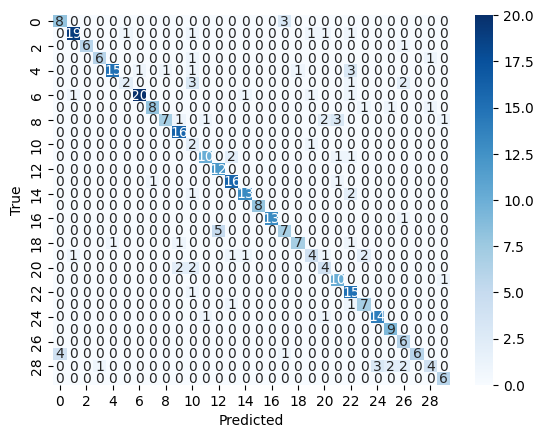

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get true labels and predictions
true_labels = []
predicted_labels = []

for images, labels in val_ds:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

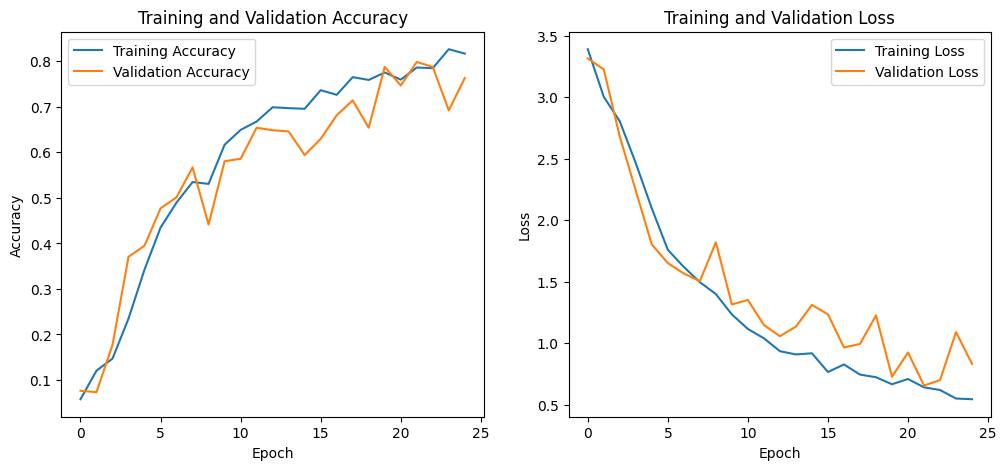

In [ ]:
# Assuming `history` contains the training history
#history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

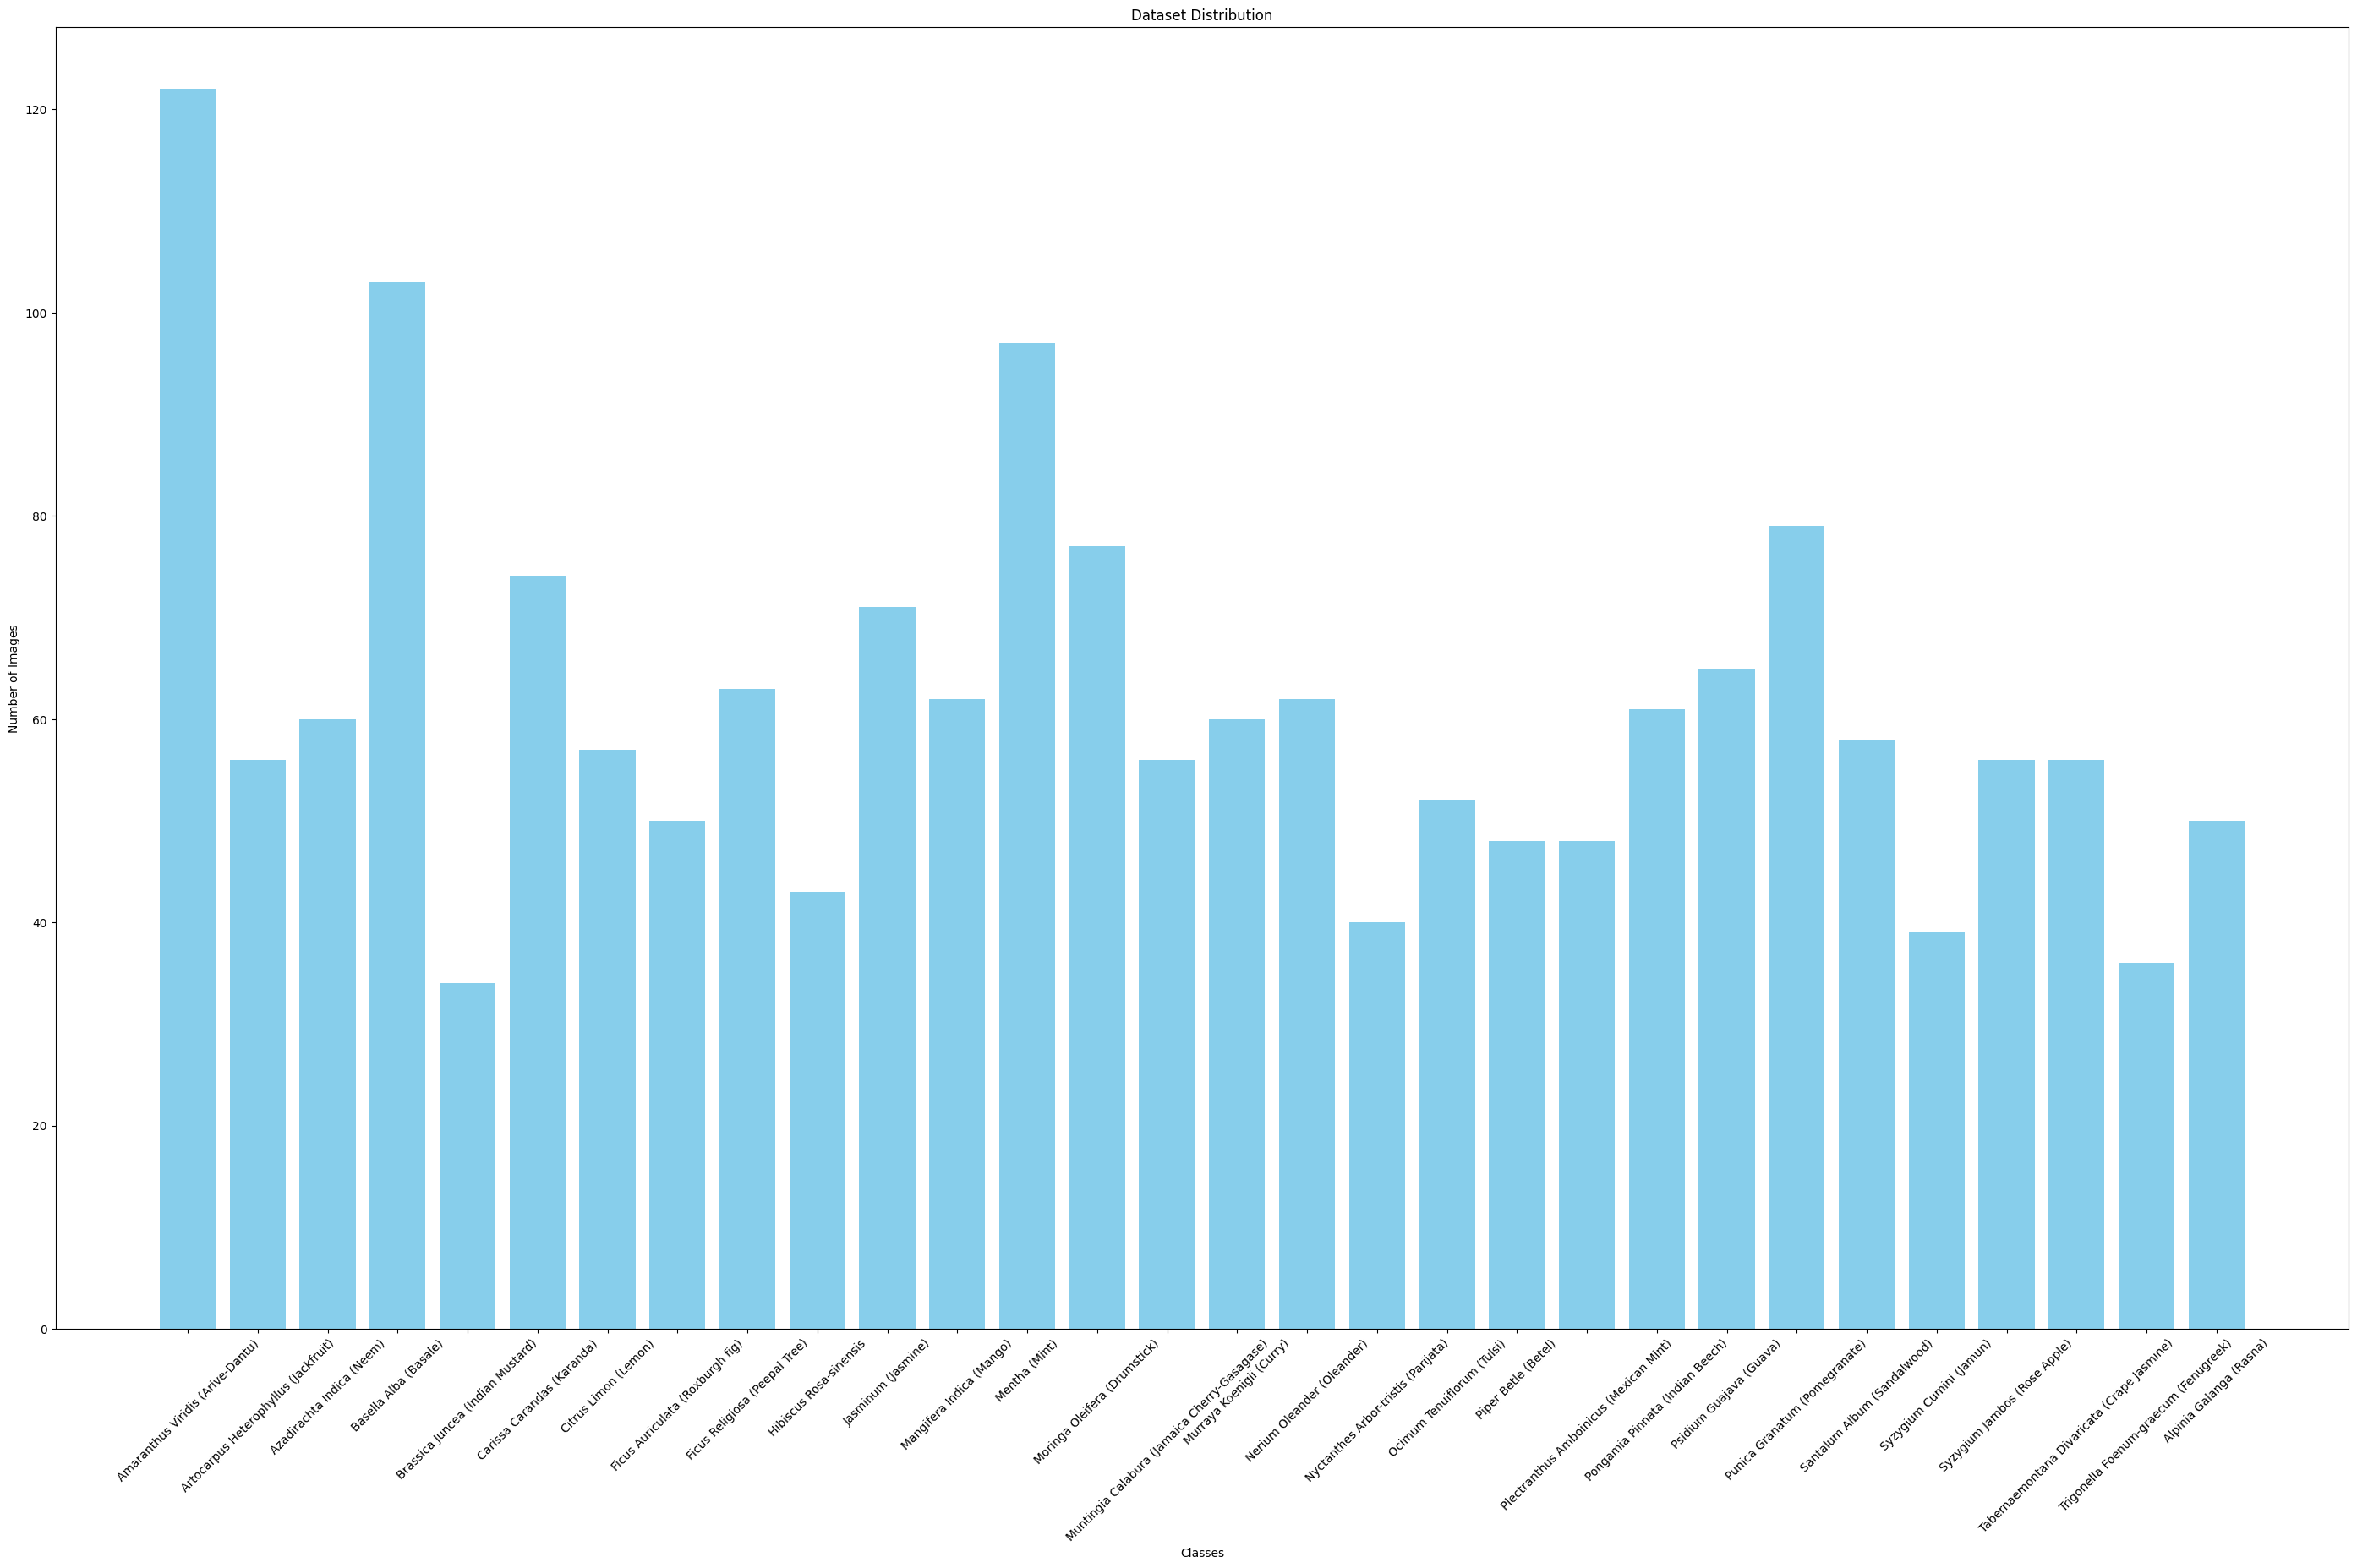

In [ ]:
# 1. Dataset Distribution
folders = os.listdir('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images')  # Change to dataset path
class_counts = {folder: len(os.listdir(os.path.join('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images', folder))) for folder in folders}
plt.figure(figsize=(35,20))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Dataset Distribution')
plt.show()

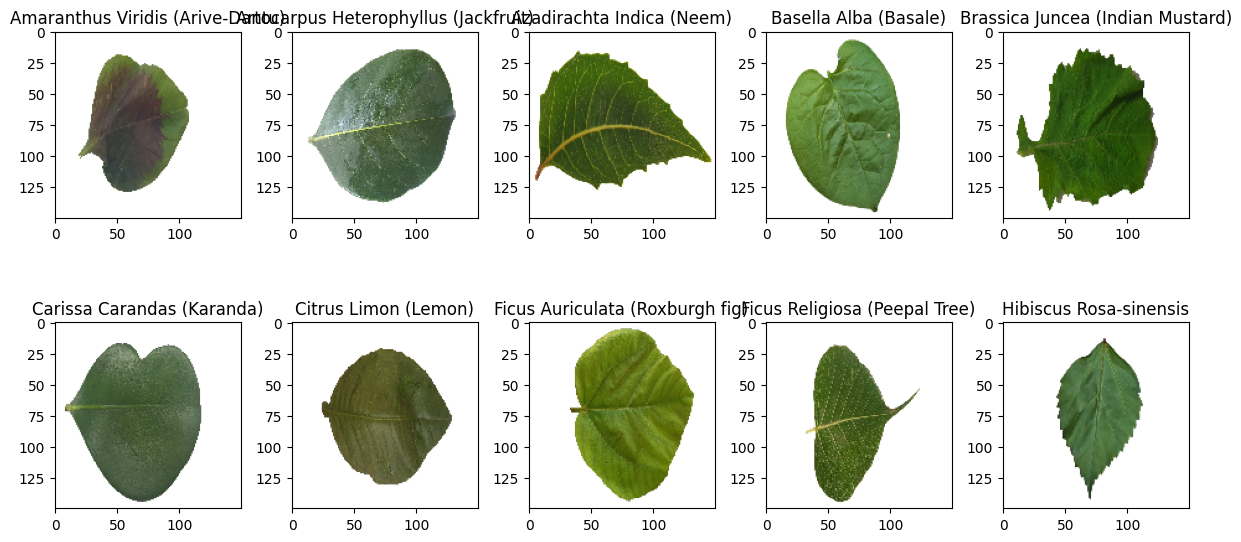

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, folder in enumerate(list(class_counts.keys())[:10]):
    img_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images', folder, os.listdir(os.path.join('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images', folder))[0])
    img = load_img(img_path, target_size=(150, 150))
    axes[i//5, i%5].imshow(img)
    axes[i//5, i%5].set_title(folder)
    axes[i//5, i%5].axis('on')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


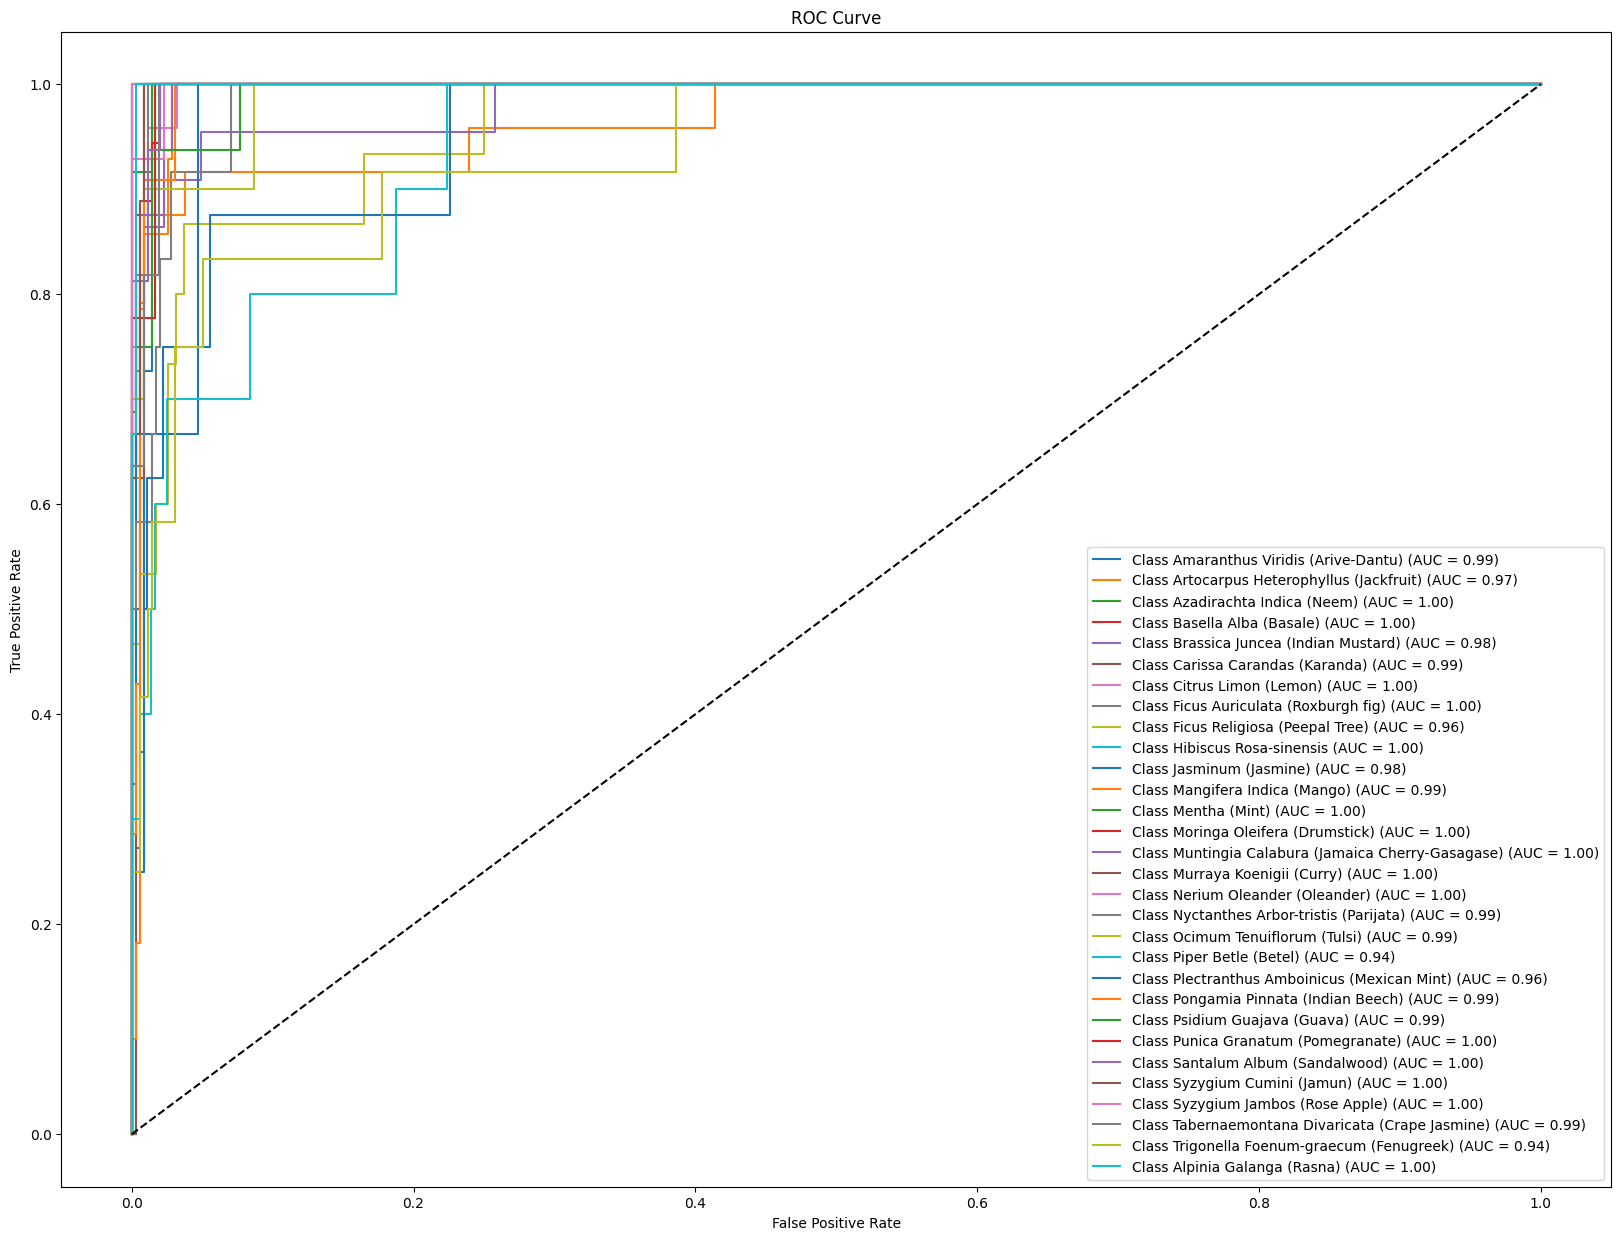

In [ ]:
!pip install scikit-learn
from sklearn.metrics import roc_curve, auc # Importing the missing function

# ... rest of your code ...

# Assuming you have 'val_ds' for validation data and 'model' for your trained model
y_true = []
y_pred = []
for images, labels in val_ds:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(predictions)

y_true = np.array(y_true)  # Convert to NumPy array
y_pred = np.array(y_pred)  # Convert to NumPy array

n_classes = len(folders)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ... rest of your plotting code ...
plt.figure(figsize=(20,15))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {folders[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Trend Analysis (Loss & Accuracy)
def trend_analysis(history):
    epochs = range(len(history.history['accuracy']))
    accuracy_diff = np.diff(history.history['val_accuracy'])
    loss_diff = np.diff(history.history['val_loss'])

    print("Trend Analysis:")
    print("- If accuracy improves and loss decreases consistently, the model is learning well.")
    print("- If accuracy plateaus and loss fluctuates, learning is stagnating.")
    print("- If validation loss increases while training loss decreases, overfitting is occurring.")

    return accuracy_diff, loss_diff

accuracy_trend, loss_trend = trend_analysis(history)

Trend Analysis:
- If accuracy improves and loss decreases consistently, the model is learning well.
- If accuracy plateaus and loss fluctuates, learning is stagnating.
- If validation loss increases while training loss decreases, overfitting is occurring.


In [ ]:
# Pattern Identification from Confusion Matrix
def pattern_identification(c_matrix, classes):
    misclassifications = np.sum(c_matrix, axis=1) - np.diag(c_matrix)
    high_error_classes = [classes[i] for i in range(len(classes)) if misclassifications[i] > np.mean(misclassifications)]

    print("Pattern Identification:")
    print("- High error classes indicate potential dataset issues or similar class features.")
    print("- If a specific class is misclassified often, data augmentation or re-labeling might be needed.")

    return high_error_classes

# Assuming 'cm' is the confusion matrix calculated earlier
misclassified_classes = pattern_identification(cm, folders) # Pass the 'cm' variable as the 'c_matrix' argument

Pattern Identification:
- High error classes indicate potential dataset issues or similar class features.
- If a specific class is misclassified often, data augmentation or re-labeling might be needed.


In [ ]:
# Trend Analysis (Loss & Accuracy)
def trend_analysis(history):
    epochs = range(len(history.history['accuracy']))
    accuracy_diff = np.diff(history.history['val_accuracy'])
    loss_diff = np.diff(history.history['val_loss'])

    improving = np.sum(accuracy_diff > 0)
    stagnating = np.sum(accuracy_diff == 0)
    declining = np.sum(accuracy_diff < 0)

    print("Trend Analysis Results:")
    print(f"- Improving Epochs: {improving}")
    print(f"- Stagnating Epochs: {stagnating}")
    print(f"- Declining Epochs: {declining}")

    if declining > improving:
        print("- Model might be overfitting or not generalizing well.")
    elif improving > declining:
        print("- Model is learning effectively.")
    else:
        print("- Model needs tuning as it is stagnating.")

    return accuracy_diff, loss_diff

accuracy_trend, loss_trend = trend_analysis(history)

Trend Analysis Results:
- Improving Epochs: 15
- Stagnating Epochs: 0
- Declining Epochs: 9
- Model is learning effectively.


In [ ]:
# Pattern Identification from Confusion Matrix
def pattern_identification(c_matrix, classes):
    misclassifications = np.sum(c_matrix, axis=1) - np.diag(c_matrix)
    high_error_classes = [classes[i] for i in range(len(classes)) if misclassifications[i] > np.mean(misclassifications)]

    print("Pattern Identification Results:")
    print(f"- Classes with high misclassification: {high_error_classes}")

    if high_error_classes:
        print("- These classes may need more data or better feature extraction.")
    else:
        print("- No major misclassification patterns detected.")

    return high_error_classes

# Assuming 'cm' is the confusion matrix calculated earlier, pass it as 'c_matrix'
misclassified_classes = pattern_identification(cm, folders) # Changed 'c_matrix' to 'cm'

Pattern Identification Results:
- Classes with high misclassification: ['Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Mangifera Indica (Mango)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 'Plectranthus Amboinicus (Mexican Mint)', 'Tabernaemontana Divaricata (Crape Jasmine)', 'Trigonella Foenum-graecum (Fenugreek)']
- These classes may need more data or better feature extraction.


In [ ]:
# 6. Anomaly Detection (Blurry vs. Normal Images)
from tensorflow.keras.preprocessing.image import img_to_array # Import img_to_array

def detect_blurry_images(image_paths):
    blurry_images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(150, 150))
        img_array = img_to_array(img)
        variance = np.var(img_array)
        if variance < 1000:  # Threshold for detecting blurriness
            blurry_images.append(img_path)

    print("Anomaly Detection Results:")
    print(f"- Total Blurry Images Detected: {len(blurry_images)}")
    if blurry_images:
        print("- Consider removing or enhancing blurry images for better model accuracy.")
    else:
        print("- No significant blurry images detected.")

    return blurry_images

image_paths = [os.path.join('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images', folder, img) for folder in folders for img in os.listdir(os.path.join('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images', folder))]

blurry_images = detect_blurry_images(image_paths)

Anomaly Detection Results:
- Total Blurry Images Detected: 0
- No significant blurry images detected.
